Simple Linear Regression
Machine Learning (ML): ML is an application of Artificial Intelligence (AI) that provides systems the ability to automatically learn themselves and improve from the experience without being explicitly programmed. ML focuses on the development of computer programs that can access data and use it to learn themselves.

Data Set: A collection of related sets of information that is composed of separate elements but can be manipulated as a unit by a computer.

Data Visualisation: It is a representation of data or information in a graph, chart, or other visual formats which is helpful to conduct analyses such as predictive analysis which can serve as helpful Visualisation to present.

Data Cleaning: It is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

Supervised Learning: The model is trained using ‘labeled data’. Datasets are said to contain labels that contain both input and output parameters. To simplify – ‘Data is already tagged with the correct answer’.

Simple Linear Regression: It is a Regression Model that estimates the relationship between the independent variable and the dependent variable using a straight line [y = mx + c], where both the variables should be quantitative.

Models: Those are output by algorithms and are comprised of model data and a prediction algorithm.

Training Model: In supervised learning, an ML Algorithm builds a model by examining many examples and attempting to find a model that minimizes loss and improves prediction accuracy.

These are the few terms used in this article and to get familiar with. Now let’s get started with the analysis and prediction of the model. In this tutorial, I am going to use supervised data and simple linear regression for analysis and prediction. The Ultimate goal is the predict the height of a person provides his age using the trained model to the highest achievable accuracy using available data. I have used the universal favorite programming language for ML i.e. Python to build and train the ML model and Google Colab Environment.

The steps involved are:

Importing the dataset.

Visualising the Data

Data Cleaning

Build the Model and Train it

Make Predictions on Unseen Data

1. IMPORTANT DATA SETS*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_pickle("/content/AgesAndHeights.pkl")
df

In [ ]:
df.shape

(100, 2)

In [ ]:
df.describe()

,Age,Height
count,100.000000,100.000000
mean,7.966138,45.955674
std,5.321621,10.787318
min,-0.780853,27.332513
25%,3.048885,36.320107
50%,7.795597,46.178251
75%,11.464331,53.994166
max,17.887852,68.170414


# **2.Visualising the Data**

We can see the data which we have and it contains only 2 columns namely, Age (in years) and Height (in inches) and 100 rows which is actually the representation of a person.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f863699b4d0>,
      dtype=object)

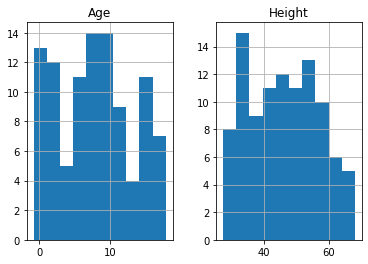

In [ ]:
df.hist()

This single line of code has a great impact on the way we look at the dataset. We only had a numerical view of the dataset but we can now run this cell to get a histogram view of the dataset which is very helpful. It represents the data present in the individual columns as individual graphs.

The Y-axis in both the plots refers to frequency and X-axis represents Age and Height respectively.

# **3.Data Cleaning**

We have to build the model using valid datasets and clean the unaccountable Data. In the above image, we can know that there are a few entries that have an age less than zero which is meaningless. Hence, we need to clean those data to get better accuracy.

In [ ]:
cleaned_data = df[df['Age']>0]
cleaned_data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


I use variable cleaned_data to store the valid age values and display them to the user.

Initially, we had 100 rows but after performing Data Cleaning it’s pretty clear that there are seven rows which we had age < 0 and we have removed them. As a professional, we aren’t supposed to delete the data as we are reducing the data and thereby accuracy of our model gets reduced. To keep it simple I have just removed them.

Visualize the Cleaned Data: I have now used the cleaned data and visualized it in the form of a graph.

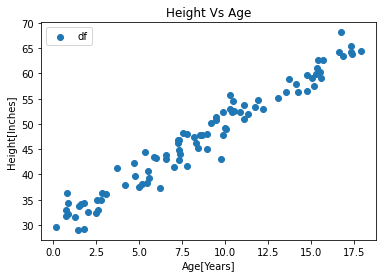

In [ ]:
ages = cleaned_data['Age']
heights = cleaned_data['Height']
plt.scatter(ages,heights,label='df')
plt.title('Height Vs Age')
plt.xlabel('Age[Years]')
plt.ylabel('Height[Inches]')
plt.legend()

# **4.Build the Model and Train it**

In [ ]:
def y_hat(age,params):
  alpha=params['alpha']
  beta=params['beta']
  return alpha+beta*age
y_hat(5,parameters)

60

I used a dictionary named parameters which has alpha and beta as key with 40 and 4 as values respectively. I have also defined a function y_hat which takes age, and params as parameters. This function uses the basic straight-line equation and returns y i.e. height as in our case. If we pass the required parameters and run the function, we find that the height we get for the age as input is not matched. Hence, we use the function mentioned below to rain the model.

In [ ]:
def learn_parameters(data,params):
  x,y=df['Age'],df['Height']
  x_bar,y_bar=x.mean(),y.mean()
  x,y=x.to_numpy(),y.to_numpy()
  beta = sum(((x-x_bar)*(y-y_bar))/sum((x-x_bar)**2))
  alpha=y_bar-beta*x_bar
  params['alpha']=alpha
  params['beta']=beta

This is where we use a method to find the correct alpha and beta. The function learn_parameters takes cleaned_data and a dummy dictionary new_parameter which can have any value for alpha and beta. So, when we pass them as arguments to parameters and function runs and we can get the correct value of alpha and beta which is found to close to 30 and 2 respectively and replace the old values with the new ones.

In [ ]:
new_parameter = {'alpha':-2,'beta':1000}
learn_parameters(cleaned_data,new_parameter)
new_parameter

{'alpha': 30.138136682479868, 'beta': 1.9855967045381253}

We have accurately found the values of alpha and beta, and our next goal is to train the data. But let me the untrained predicted values to what extent they are accurate.

In [ ]:
spaced_ages=list(range(19))
spaced_untrained_predictions = [y_hat(x,parameters) for x in spaced_ages]
print(spaced_untrained_predictions)

[40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112]


I use a list named spaces_ages that has values from 0 to 18 (end – 1). Then another list named spaced_untrained_predictions that has the predicted values for the height uses the y_hat function defined earlier to predict it. These values are plotted in a graph and visualized.

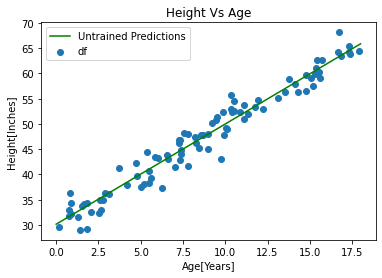

In [ ]:
ages = cleaned_data['Age']
heights=cleaned_data['Height']
plt.scatter(ages,heights,label="df")
plt.plot(spaced_ages,spaced_untrained_predictions,label='Untrained Predictions',color='green')
plt.title('Height Vs Age')
plt.xlabel('Age[Years]')
plt.ylabel('Height[Inches]')
plt.legend()

The green line shows that the spaced_untrained_predictions have largely deviated from the actual values and the accuracy is very poor. Hence, accuracy needs to be increased for which we need to train the data.

[30.138136682479868, 32.12373338701799, 34.10933009155612, 36.09492679609424, 38.08052350063237, 40.06612020517049, 42.05171690970862, 44.03731361424674, 46.02291031878487, 48.00850702332299, 49.994103727861116, 51.97970043239924, 53.96529713693737, 55.9508938414755, 57.93649054601362, 59.92208725055175, 61.90768395508987, 63.893280659628, 65.87887736416613]


Text(0, 0.5, 'Height [Inches]')

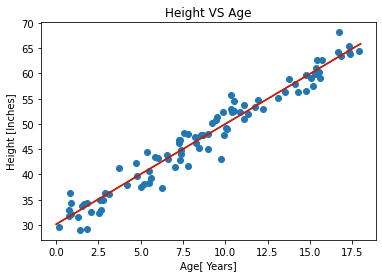

In [ ]:
spaced_trained_predictions=[y_hat (x, new_parameter) for x in spaced_ages]
print (spaced_trained_predictions)
plt.scatter(ages,heights, label='df')
plt.plot(spaced_ages,spaced_untrained_predictions,label='Untrained Predictions',color='green')
plt.plot(spaced_ages, spaced_trained_predictions, label= 'Trained Predictions', color='red')
plt.title('Height VS Age')
plt.xlabel('Age[ Years]')
plt.ylabel('Height [Inches]')

# **5.Make Predictions on Unseen Data**

With the help of this trained model, we can now make accurate predictions.

In [ ]:
new_age=int(input('Enter age to predict height : '))
y_hat(new_age,new_parameter)

Enter age to predict height : 3


36.09492679609424

So, we can see for any given age we find the possible height in inches. Finally, we have successfully trained the model and with utmost accuracy....